# Notebook to explore the predictions of the model


In [1]:
import pandas as pd

In [2]:
sequence_number = 0
run_type = 'calibration'
eval_type = 'standard'
userpath = '/Users/havardhegre1'
path = f'{userpath}/views-platform/views-models/models/purple_haze/data/generated'
predictions_full_df = pd.read_parquet(f'{path}/final_pred_full_{run_type}_{eval_type}_{sequence_number}.parquet')
predictions_agg_df = pd.read_parquet(f'{path}/final_preds_{run_type}_{eval_type}_{sequence_number}_agg.parquet')


In [3]:
predictions_agg_df.describe()

,step_combined
count,6876.000000
mean,25.751361
std,298.628531
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,12714.140000


In [4]:
predictions_agg_df.head()

step_combined
month_id country_id               
397      1                     0.0
         2                     0.0
         3                     0.0
         4                     0.0
         5                     0.0

In [5]:

predictions_full_df.describe()

,step_combined,submodel
count,343800.000000,343800.000000
mean,25.751361,2.000000
std,322.468072,1.414216
min,-0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,2.000000
75%,0.000000,3.000000
max,21501.000000,4.000000


In [6]:
predictions_full_df.head(20)

step_combined  submodel
month_id country_id sample                         
397      1          0                 0.0         0
         2          0                 0.0         0
         3          0                 0.0         0
         4          0                 0.0         0
         5          0                 0.0         0
         6          0                 0.0         0
         7          0                 0.0         0
         8          0                 0.0         0
         9          0                 0.0         0
         10         0                 0.0         0
         11         0                 0.0         0
         12         0                 0.0         0
         13         0                 0.0         0
         14         0                 0.0         0
         16         0                 0.0         0
         17         0                 0.0         0
         18         0                 0.0         0
         19         0                 0.0         0
         20         0                 0.0         0
         21         0                 0.0         0

Country: 70
count    50.000000
mean      8.400000
std       2.920721
min       4.000000
25%       7.000000
50%       8.000000
75%      10.000000
max      17.000000
Name: step_combined, dtype: float64


/var/folders/bz/1cx7kmbj2919xmdqxy83mbs80000gp/T/ipykernel_51528/3605983241.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(predictions_full_df['step_combined'].loc[month, country].describe())
/var/folders/bz/1cx7kmbj2919xmdqxy83mbs80000gp/T/ipykernel_51528/3605983241.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(predictions_full_df['step_combined'].loc[month, country].hist(bins=50))


Axes(0.125,0.11;0.775x0.77)
Country: 245
count    50.000000
mean     14.240000
std      14.570812
min       0.000000
25%       0.000000
50%      15.750000
75%      25.375000
max      59.500000
Name: step_combined, dtype: float64
Axes(0.125,0.11;0.775x0.77)
Country: 246
count     50.000000
mean      61.300000
std       20.157796
min       23.000000
25%       44.250000
50%       60.000000
75%       73.500000
max      114.000000
Name: step_combined, dtype: float64
Axes(0.125,0.11;0.775x0.77)


/var/folders/bz/1cx7kmbj2919xmdqxy83mbs80000gp/T/ipykernel_51528/3605983241.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(predictions_full_df['step_combined'].loc[month, country].describe())
/var/folders/bz/1cx7kmbj2919xmdqxy83mbs80000gp/T/ipykernel_51528/3605983241.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(predictions_full_df['step_combined'].loc[month, country].hist(bins=50))
/var/folders/bz/1cx7kmbj2919xmdqxy83mbs80000gp/T/ipykernel_51528/3605983241.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(predictions_full_df['step_combined'].loc[month, country].describe())
/var/folders/bz/1cx7kmbj2919xmdqxy83mbs80000gp/T/ipykernel_51528/3605983241.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(predictions_full_df['step_combined'].loc[month, country].hist(bins=50))


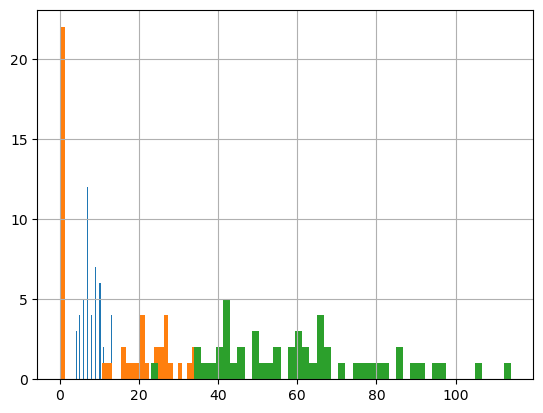

In [7]:
# inspect predictions for a specific country and month  
month = 397
for country in [70,245, 246]:
    print(f'Country: {country}')
    print(predictions_full_df['step_combined'].loc[month, country].describe())
    print(predictions_full_df['step_combined'].loc[month, country].hist(bins=50))

In [50]:
predictions_full_df.loc[month, 245].head()


/var/folders/bz/1cx7kmbj2919xmdqxy83mbs80000gp/T/ipykernel_43627/3380200236.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  predictions_full_df.loc[month, 245].head()


,step_combined,submodel
sample,,
0,17.0,0
1,59.5,0
2,26.5,0
3,0.0,0
4,0.0,0
